## ARIMA with Python

In [1]:
import pandas as pd
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

C:\Users\Aaron\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


### Read the Data

In [2]:
series = read_csv('Resources/overall_monthly.csv', header=0, parse_dates=True, index_col='DATE', squeeze=True)
print(series.head())

DATE
2000-01-01    4.0
2000-02-01    4.1
2000-03-01    4.0
2000-04-01    3.8
2000-05-01    4.0
Name: Rate_Overall, dtype: float64


### Plot the Data

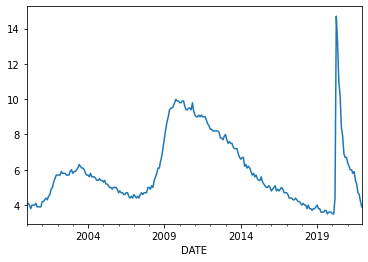

In [3]:
series.plot()
pyplot.show()

### Auto-Correlation Plot

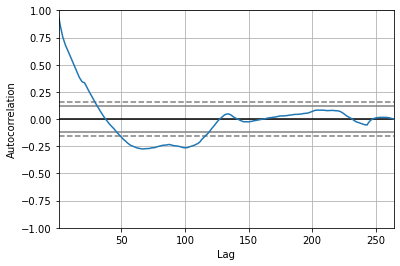

In [4]:
autocorrelation_plot(series)
pyplot.show()

In [5]:
series.index = series.index.to_period('M')

### Fit the Model

In [6]:
# fit model
model = ARIMA(series, order=(0,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           Rate_Overall   No. Observations:                  264
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -276.737
Date:                Sun, 20 Mar 2022   AIC                            555.474
Time:                        20:03:10   BIC                            559.046
Sample:                    01-31-2000   HQIC                           556.909
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.4803      0.004    110.357      0.000       0.472       0.489
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):            374579.88
Prob(Q):                              0.64   Pr

### Plot the Residuals

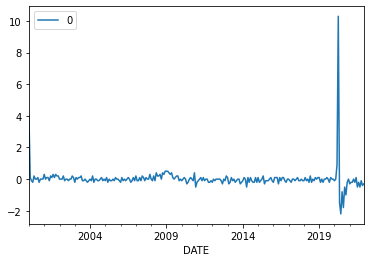

In [7]:
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

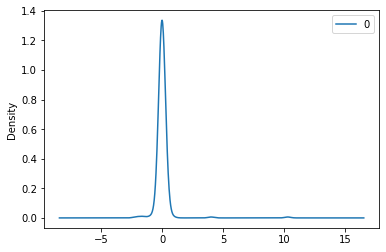

In [8]:
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()

In [9]:
# summary stats of residuals
print(residuals.describe())

                0
count  264.000000
mean     0.014773
std      0.735448
min     -2.200000
25%     -0.100000
50%      0.000000
75%      0.100000
max     10.300000


## Rolling Forecast ARIMA Model

In [10]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [11]:
# load dataset
#def parser(x):
#	return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('Resources/overall_monthly.csv', header=0, parse_dates=True, index_col='DATE')
print(series.head())
#series.index = series.index.to_period('M')

            Rate_Overall
DATE                    
2000-01-01           4.0
2000-02-01           4.1
2000-03-01           4.0
2000-04-01           3.8
2000-05-01           4.0


### Split the Dataset

In [12]:
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
##size = int(len(series) * 0.66)
train = X[0:size]
test = X[size:len(X)]
history = [x for x in train]
predictions = list()

### Validate

In [13]:
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(0,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=6.100000, expected=6.200000
predicted=6.200000, expected=6.100000
predicted=6.100000, expected=5.900000
predicted=5.900000, expected=5.700000
predicted=5.700000, expected=5.800000
predicted=5.800000, expected=5.600000
predicted=5.600000, expected=5.700000
predicted=5.700000, expected=5.500000
predicted=5.500000, expected=5.400000
predicted=5.400000, expected=5.400000
predicted=5.400000, expected=5.600000
predicted=5.600000, expected=5.300000
predicted=5.300000, expected=5.200000
predicted=5.200000, expected=5.100000
predicted=5.100000, expected=5.000000
predicted=5.000000, expected=5.000000
predicted=5.000000, expected=5.100000
predicted=5.100000, expected=5.000000
predicted=5.000000, expected=4.800000
predicted=4.800000, expected=4.900000
predicted=4.900000, expected=5.000000
predicted=5.000000, expected=5.100000
predicted=5.100000, expected=4.800000
predicted=4.800000, expected=4.900000
predicted=4.900000, expected=4.800000
predicted=4.800000, expected=4.900000
predicted=4.

In [14]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.161


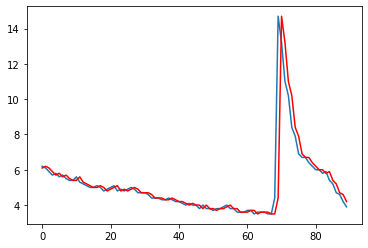

In [15]:
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

### Predictions ???

In [16]:
# ??